In [10]:
import tensorflow as tf
import cv2
import os
import numpy as np


In [11]:
root_path = os.getcwd()
train_path = root_path+"/cats_and_dogs_filtered/train"
val_path = root_path+"/cats_and_dogs_filtered/validation"

In [12]:
input_size = (64,64)
input_shape = (64,64,3)

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,input_size)
    return img


In [13]:

X_train,Y_train = [],[]
X_val,Y_val = [],[]


# Load Train
for cur_class in os.listdir(train_path):
    label = ""
    if cur_class == "cats":
        label = [1,0]
    else:
        label = [0,1]

    for filename in os.listdir(train_path+"/"+cur_class):
        img_path = train_path+"/"+cur_class+"/"+filename
        img = load_img(img_path)
        X_train.append(img)
        Y_train.append(label)



# Load Test
for cur_class in os.listdir(val_path):
    label = ""
    if cur_class == "cats":
        label = [1,0]
    else:
        label = [0,1]

    for filename in os.listdir(val_path+"/"+cur_class):
        img_path = val_path+"/"+cur_class+"/"+filename
        img = load_img(img_path)
        X_val.append(img)
        Y_val.append(label)


X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

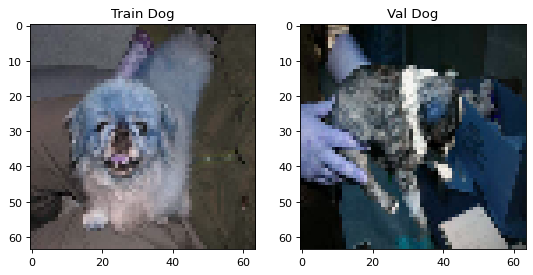

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

index = 19

figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title("Train Dog")
plt.imshow(X_train[index])


plt.subplot(1,2,2)
plt.title("Val Dog")
plt.imshow(X_val[index])



plt.show()

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Conv Layer 1
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 1
    Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 2
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 2
    Flatten(),                                                      # Flatten Layer
    Dense(128, activation='relu'),                                  # Fully Connected Layer
    Dense(2, activation='softmax')      
])
model.summary()

/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

#### 1. Conv Layer 1:
- Input Shape: (64, 64, 3)
- Number of Filters: 32
- Kernel Size: (3, 3)
- Parameters: (3 * 3 * 3 + 1) * 32 = 896


#### 3. Conv Layer 2:
- Input Shape: (31, 31, 32) (The size is halved after max pooling)
- Number of Filters: 64
- Kernel Size: (3, 3)
- Parameters: (3 * 3 * 32 + 1) * 64 = 18,496



#### 5. Flatten Layer:
- The output from the second conv layer and max pooling is reshaped into a flat vector.
- Shape after second pooling: (14, 14, 64)
- Total Units after Flatten: 14 * 14 * 64 = 12,544
- No trainable parameters here, as this layer just reshapes the data.

#### 6. Fully Connected (Dense) Layer:
- Input Size: 12,544
- Output Neurons: 128
- Parameters: (12,544 + 1) * 128 = 1,605,760

#### 7. Output Layer:
- Input Size: 128
- Output Neurons: 2 (for binary classification)
- Parameters: (128 + 1) * 2 = 258



- Conv Layer 1: 896
- Conv Layer 2: 18,496
- Dense Layer: 1,605,760
- Output Layer: 258
- Total Trainable Parameters = 896 + 18,496 + 1,605,760 + 258 = 1,625,410

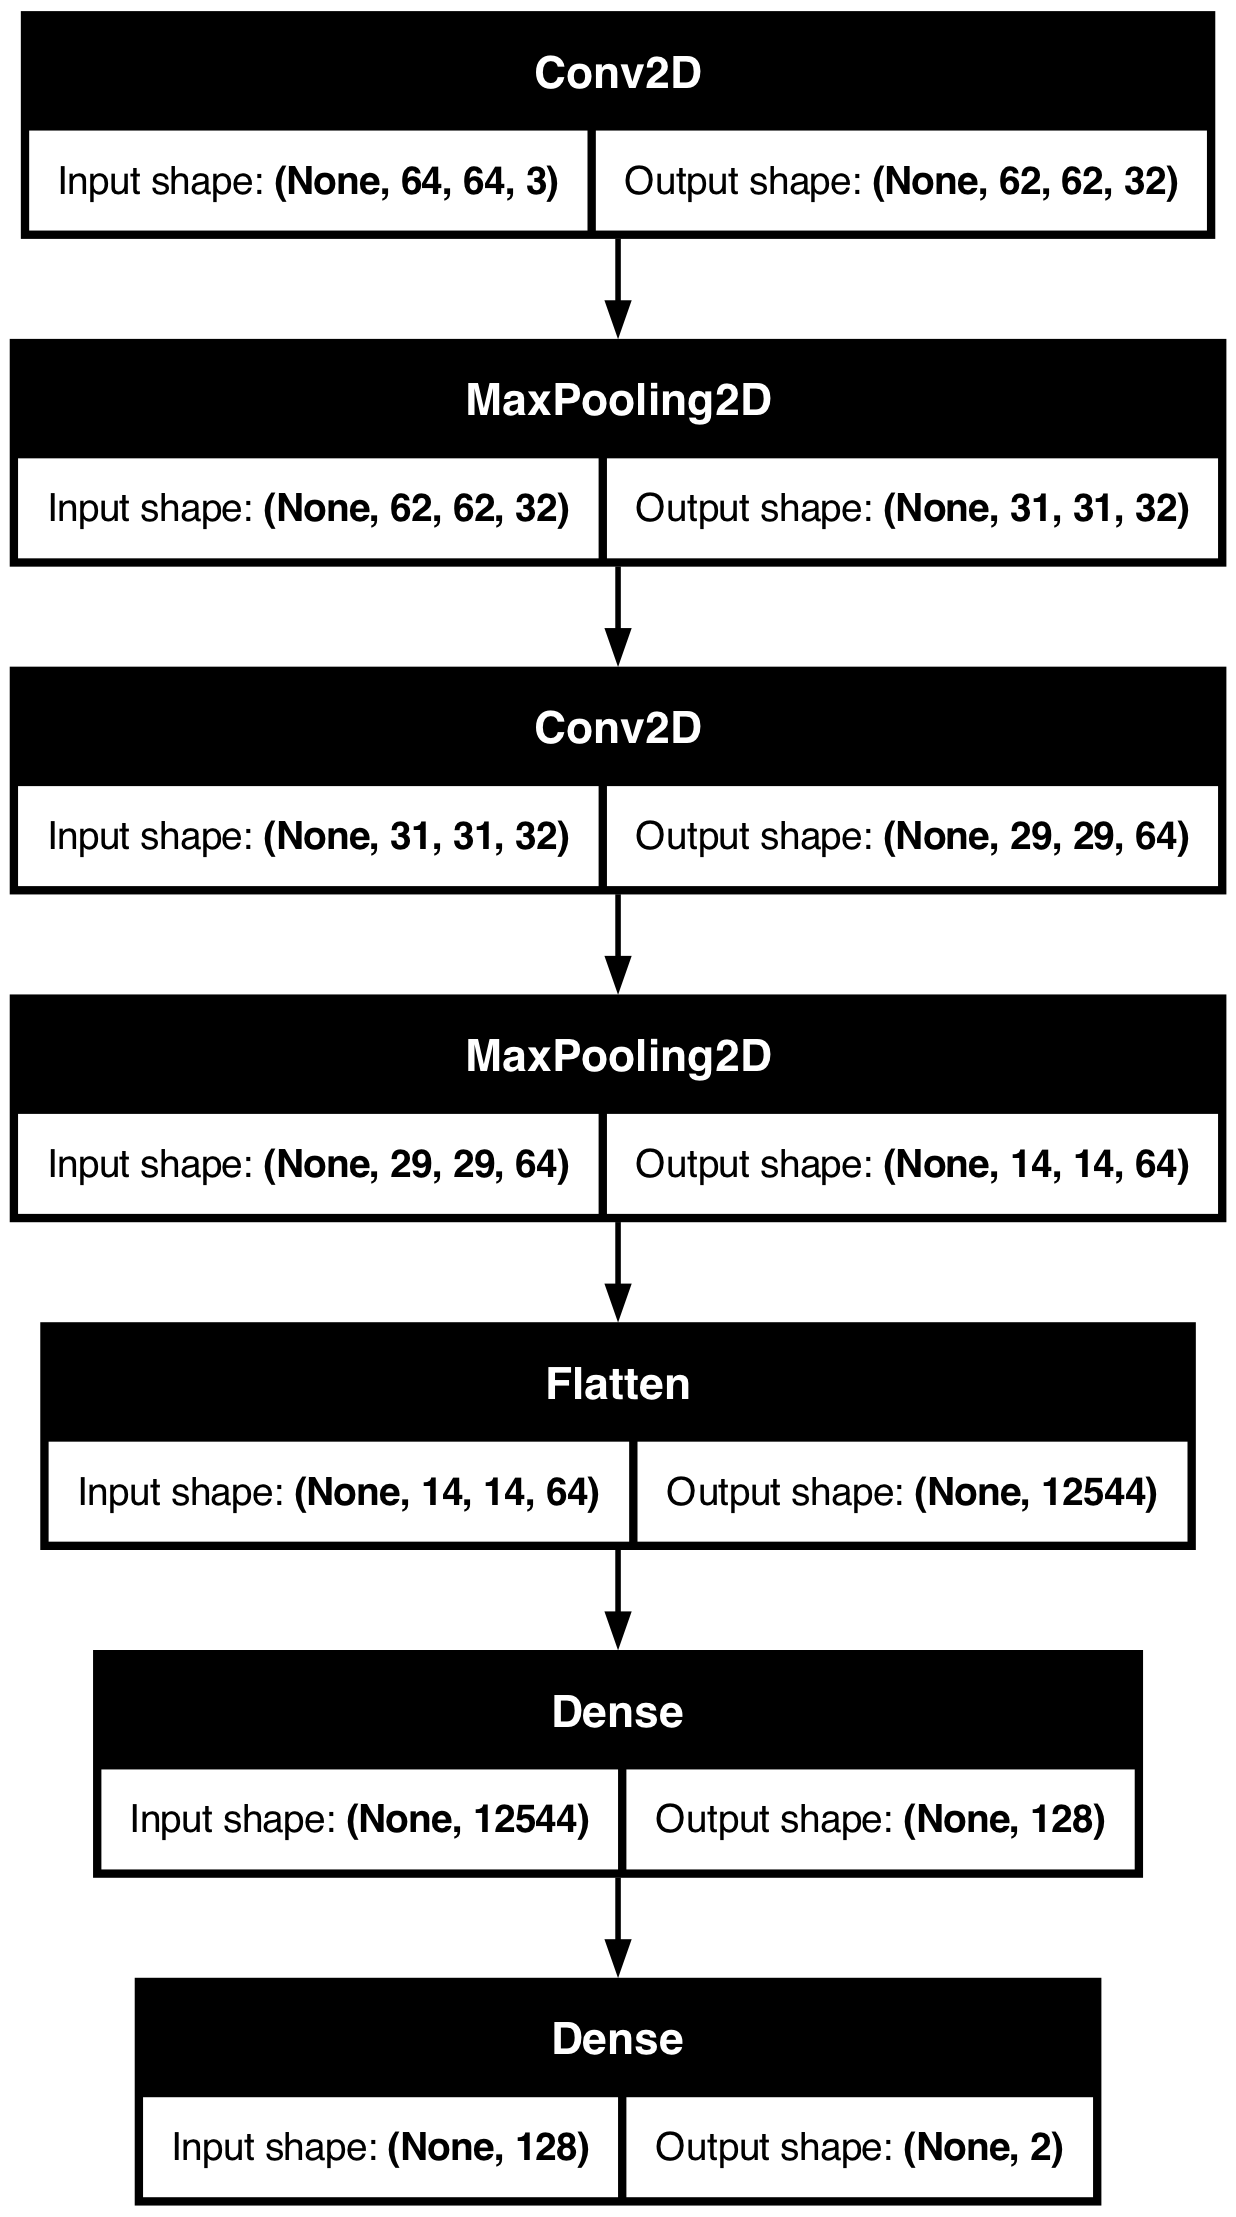

In [16]:

tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [24]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [25]:
history = model.fit(
    x = np.array(X_train),
    y = np.array(Y_train),
    validation_data = (X_val,Y_val),
    batch_size=16,
    epochs=10,
    verbose=1)


Epoch 1/10


2024-08-03 08:55:24.557130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5272 - loss: 29.8850 - val_accuracy: 0.6330 - val_loss: 0.6380
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7265 - loss: 0.5561 - val_accuracy: 0.6240 - val_loss: 0.6755
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8067 - loss: 0.4195 - val_accuracy: 0.6420 - val_loss: 0.7491
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9029 - loss: 0.2343 - val_accuracy: 0.6370 - val_loss: 0.8518
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9418 - loss: 0.1723 - val_accuracy: 0.6310 - val_loss: 1.1771
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9412 - loss: 0.1532 - val_accuracy: 0.6210 - val_loss: 1.3477
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9633 - loss: 0.1033 - val_accuracy: 0.6550 - val_loss: 1.4484
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.63

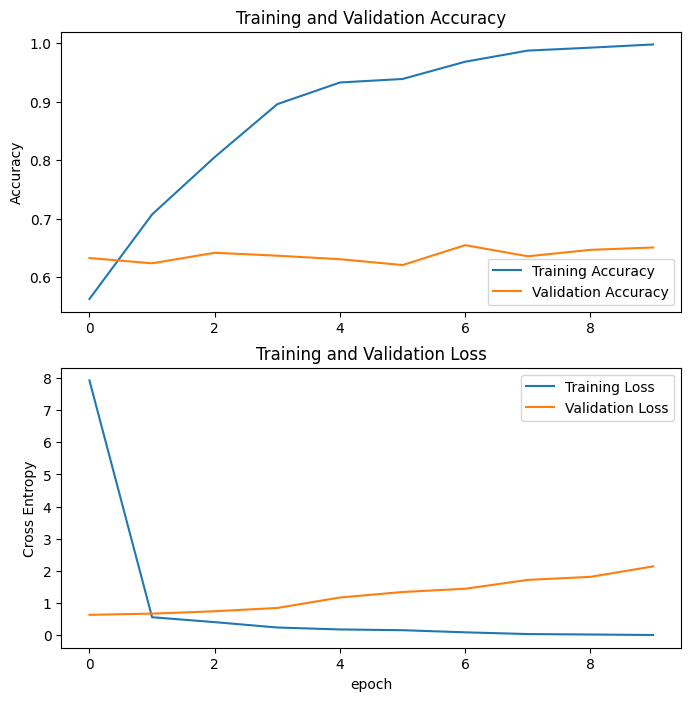

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

(1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
cat


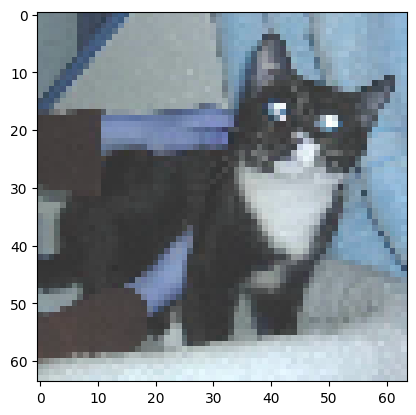

In [27]:
labels = ["cat","dog"]

test_img_path = "./cats_and_dogs_filtered/validation/cats/cat.2000.jpg"



test_img = np.array([load_img(test_img_path)])
print(test_img.shape)

pred_ = model.predict(test_img)
pred_label = labels[np.argmax(pred_)]
print(pred_label)
plt.imshow(test_img[0])

In [28]:
eval_loss, eval_acc = model.evaluate(X_val,Y_val)
print('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6364 - loss: 2.2219
Eval loss: 2.143580436706543, Eval accuracy: 0.6510000228881836


In [31]:
#HDF 5 save format 
model_file = "sample_model.h5"
model.save(model_file)


In [32]:
new_model = tf.keras.models.load_model(model_file)
eval_loss, eval_acc = model.evaluate(X_val,Y_val)
print('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))
new_model.summary()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6364 - loss: 2.2219
Eval loss: 2.143580436706543, Eval accuracy: 0.6510000228881836


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,412 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)